# Task 1: Laying the Foundation for Analysis
## Change Point Analysis and Statistical Modeling of Brent Oil Prices

**Objective**: Define the data analysis workflow and develop a thorough understanding of the model and data.

**Due Date**: Interim Submission - Sunday, 08 Feb 2026, 8:00 PM UTC

In [1]:
# Cell 1: Import Libraries and Configure Logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import logging
import sys
from pathlib import Path

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler('task_1_analysis.log')
    ]
)

logger = logging.getLogger(__name__)
logger.info('Task 1: Laying the Foundation - Analysis Started')
logger.info(f'Timestamp: {datetime.now()}')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

2026-02-05 18:37:43,312 - __main__ - INFO - Task 1: Laying the Foundation - Analysis Started
2026-02-05 18:37:43,312 - __main__ - INFO - Timestamp: 2026-02-05 18:37:43.312316


In [2]:
# Add Scripts directory to system path
import os
import sys

cwd = os.getcwd()
scripts_path = os.path.join(cwd,"..",'src')
scripts_absolute_path = os.path.abspath(scripts_path)

if scripts_absolute_path not in sys.path and os.path.isdir(scripts_absolute_path):
    sys.path.append(scripts_absolute_path)
    print(f'Added Scripts directory to system path')
    logger.info(f'Added Scripts directory to system path: ')
else:
    print(f'Scripts directory already in system path or does not exist')

Added Scripts directory to system path
2026-02-05 18:37:43,326 - __main__ - INFO - Added Scripts directory to system path: 


## Part 1: Define the Data Analysis Workflow

### Step 1.1: Document Analysis Pipeline

In [3]:
# Cell 2: Define Analysis Workflow

from analysis import DataAnalysisWorkflow


# Execute workflow documentation
workflow = DataAnalysisWorkflow()
workflow.document_workflow()
workflow.display_workflow()

2026-02-05 18:37:43,478 - analysis - INFO - Timestamp: 2026-02-05 18:37:43.478280
2026-02-05 18:37:43,478 - analysis - INFO - Workflow documented with 8 major phases

DATA ANALYSIS WORKFLOW - BRENT OIL PRICES


Step 1: DATA LOADING & PREPARATION
------------------------------------------------------------
  • Load Brent oil price CSV
  • Convert date column to datetime format
  • Handle missing values
  • Sort data chronologically
  • Validate data quality
  Tools: pandas, numpy

Step 2: EXPLORATORY DATA ANALYSIS (EDA)
------------------------------------------------------------
  • Analyze time series properties (trend, seasonality)
  • Test stationarity (ADF test)
  • Calculate log returns
  • Analyze volatility patterns
  • Visualize price movements and shocks
  Tools: statsmodels, matplotlib, seaborn
  Dependencies: Steps [1]

Step 3: RESEARCH & EVENT COMPILATION
------------------------------------------------------------
  • Research major geopolitical events
  • Research OPEC po

### Step 1.2: Load and Validate Data

In [4]:
# Cell 3: Data Loading Module
from loader import DataLoader

# Execute data loading
data_loader = DataLoader('../data/BrentOilPrices.csv')
df = data_loader.load_data()
df = data_loader.preprocess_data()
validation = data_loader.validate_data()

print('\nFirst few records:')
print(df.head(10))
print('\nLast few records:')
print(df.tail(10))

2026-02-05 18:37:43,489 - loader - INFO - Timestamp: 2026-02-05 18:37:43.489692
2026-02-05 18:37:43,489 - loader - INFO - Loading data from ../data/BrentOilPrices.csv
2026-02-05 18:37:43,489 - loader - INFO - Data loaded successfully. Shape: (9011, 2)
2026-02-05 18:37:43,489 - loader - INFO - Converting Date column to datetime format


c:\GitHub\Statistical-Modeling-of-Time-Series-Data\src\loader.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce')


2026-02-05 18:37:43,768 - loader - INFO - Sorting data by date
2026-02-05 18:37:43,770 - loader - INFO - No missing values found
2026-02-05 18:37:43,771 - loader - INFO - Validating data quality

DATA VALIDATION RESULTS
total_records: 9011
date_range: 1987-05-20 to 2022-11-14
price_range: $9.10 - $143.95
null_values: {'Date': 0, 'Price': 0}
data_types: {'Date': dtype('<M8[us]'), 'Price': dtype('float64')}
2026-02-05 18:37:43,773 - loader - INFO - Data validation completed successfully

First few records:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
5 1987-05-27  18.60
6 1987-05-28  18.60
7 1987-05-29  18.58
8 1987-06-01  18.65
9 1987-06-02  18.68

Last few records:
           Date  Price
9001 2022-11-01  95.12
9002 2022-11-02  96.07
9003 2022-11-03  95.29
9004 2022-11-04  99.53
9005 2022-11-07  99.87
9006 2022-11-08  96.85
9007 2022-11-09  93.05
9008 2022-11-10  94.25
9009 2022-11-11  96.37
9010 2022-11-14  93.5

### Step 1.3: Research and Compile Major Events

In [ ]:
# Cell 4: Event Compilation Module
from event_compiler import EventCompiler

# Execute event compilation
event_compiler = EventCompiler()
events = event_compiler.compile_events()
events_df = event_compiler.display_events()
events_df = event_compiler.export_to_csv(filepath='../data/processsed/major_events.csv')

# Summary statistics
print('\nEVENT CATEGORY SUMMARY')
print(events_df['category'].value_counts())

2026-02-05 18:37:43,789 - event_compiler - INFO - Timestamp: 2026-02-05 18:37:43.789853
2026-02-05 18:37:43,791 - event_compiler - INFO - Compiled 15 major events

MAJOR EVENTS IMPACTING BRENT OIL PRICES (1987-2022)
      date                      event_name               category                                                              description
1990-08-02         Iraq Invasion of Kuwait  Geopolitical Conflict        Iraqi invasion triggers major oil supply concerns and price spike
1991-01-17                 Gulf War Begins         Armed Conflict                   Operation Desert Storm commences, oil markets volatile
1997-07-02          Asian Financial Crisis        Economic Crisis      Currency collapse spreads across Asia, demand shock for commodities
2001-09-11            September 11 Attacks Terrorism/Geopolitical       Terrorist attacks in US impact global markets and economic outlook
2003-03-20                 Iraq War Begins         Armed Conflict                     US-

### Step 1.4: Document Assumptions and Limitations

In [ ]:
# Cell 5: Assumptions and Limitations Documentation
from documentation import AssumptionsAndLimitations

# Execute documentation
doc_module = AssumptionsAndLimitations()
doc_content = doc_module.document()
doc_module.export_to_file(doc_content,filepath='..data/processed/assumptions_and_limitations.txt')

# Display summary
print('\nKEY ASSUMPTIONS SUMMARY')
print('='*80)
for assumption in doc_content['assumptions']:
    print(f"\n{assumption['area']}:")
    print(f"  • {assumption['assumption']}")
    print(f"  • Risk: {assumption['risk']}")

print('\n\nCORRELATION VS CAUSATION - KEY POINT')
print('='*80)
print(doc_content['correlation_vs_causation']['key_distinction'])
print(f"\nThis analysis: {doc_content['correlation_vs_causation']['approach']}")

2026-02-05 18:37:43,813 - documentation - INFO - Timestamp: 2026-02-05 18:37:43.813201
2026-02-05 18:37:43,815 - documentation - INFO - Assumptions and limitations exported to assumptions_and_limitations.txt

KEY ASSUMPTIONS SUMMARY

Data Quality:
  • Brent oil price data is accurate and complete
  • Risk: Low - industry standard data source

Model Specification:
  • A single change point exists in the mean price
  • Risk: Medium - real data may have multiple regime shifts

Statistical Independence:
  • Daily price changes are conditionally independent given the regime
  • Risk: Medium - oil prices show autocorrelation and clustering

Normality:
  • Log returns approximately follow a normal distribution
  • Risk: Medium - market data often exhibits heavy tails

Event Timing:
  • Events occur on documented dates with immediate market impact
  • Risk: High - market reactions may lag or anticipate events

Causal Attribution:
  • Detected change points can be attributed to identified event

## Part 2: Time Series Properties Analysis

2026-02-05 18:37:43,823 - analysis - INFO - Calculating log returns


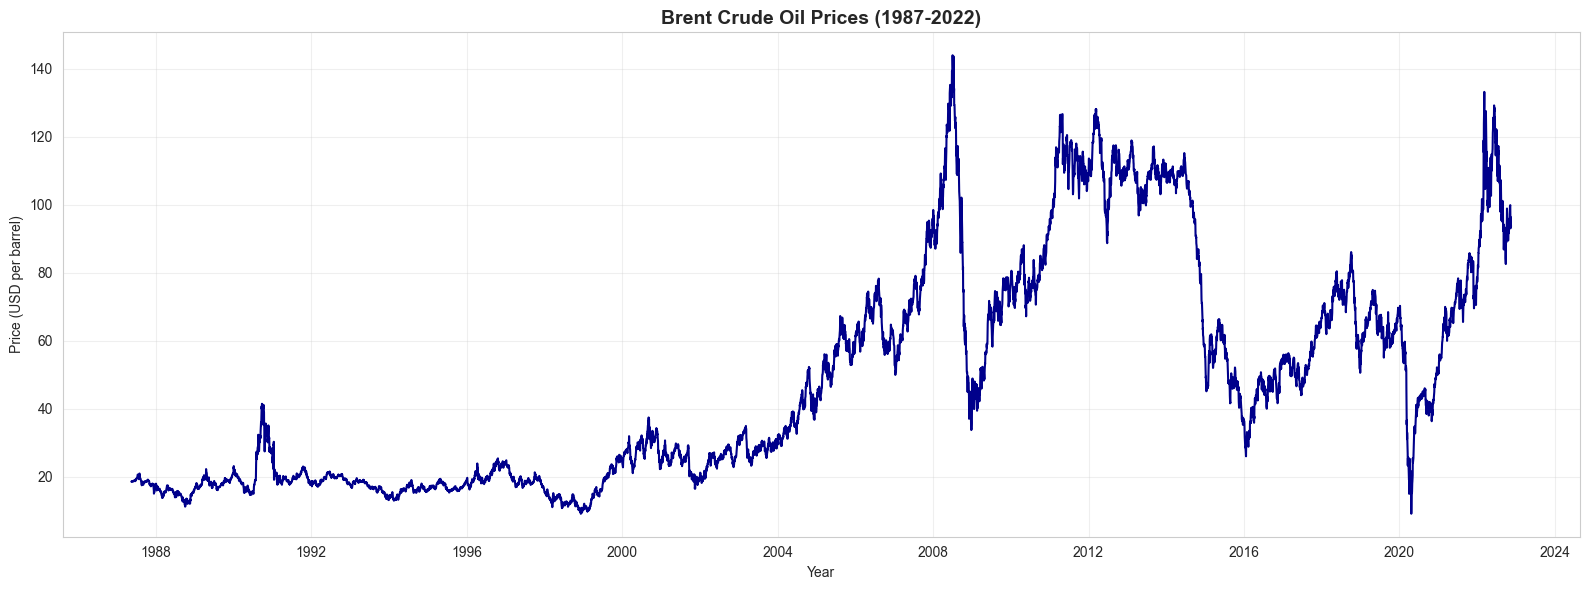

2026-02-05 18:37:44,413 - analysis - INFO - Price series plot saved


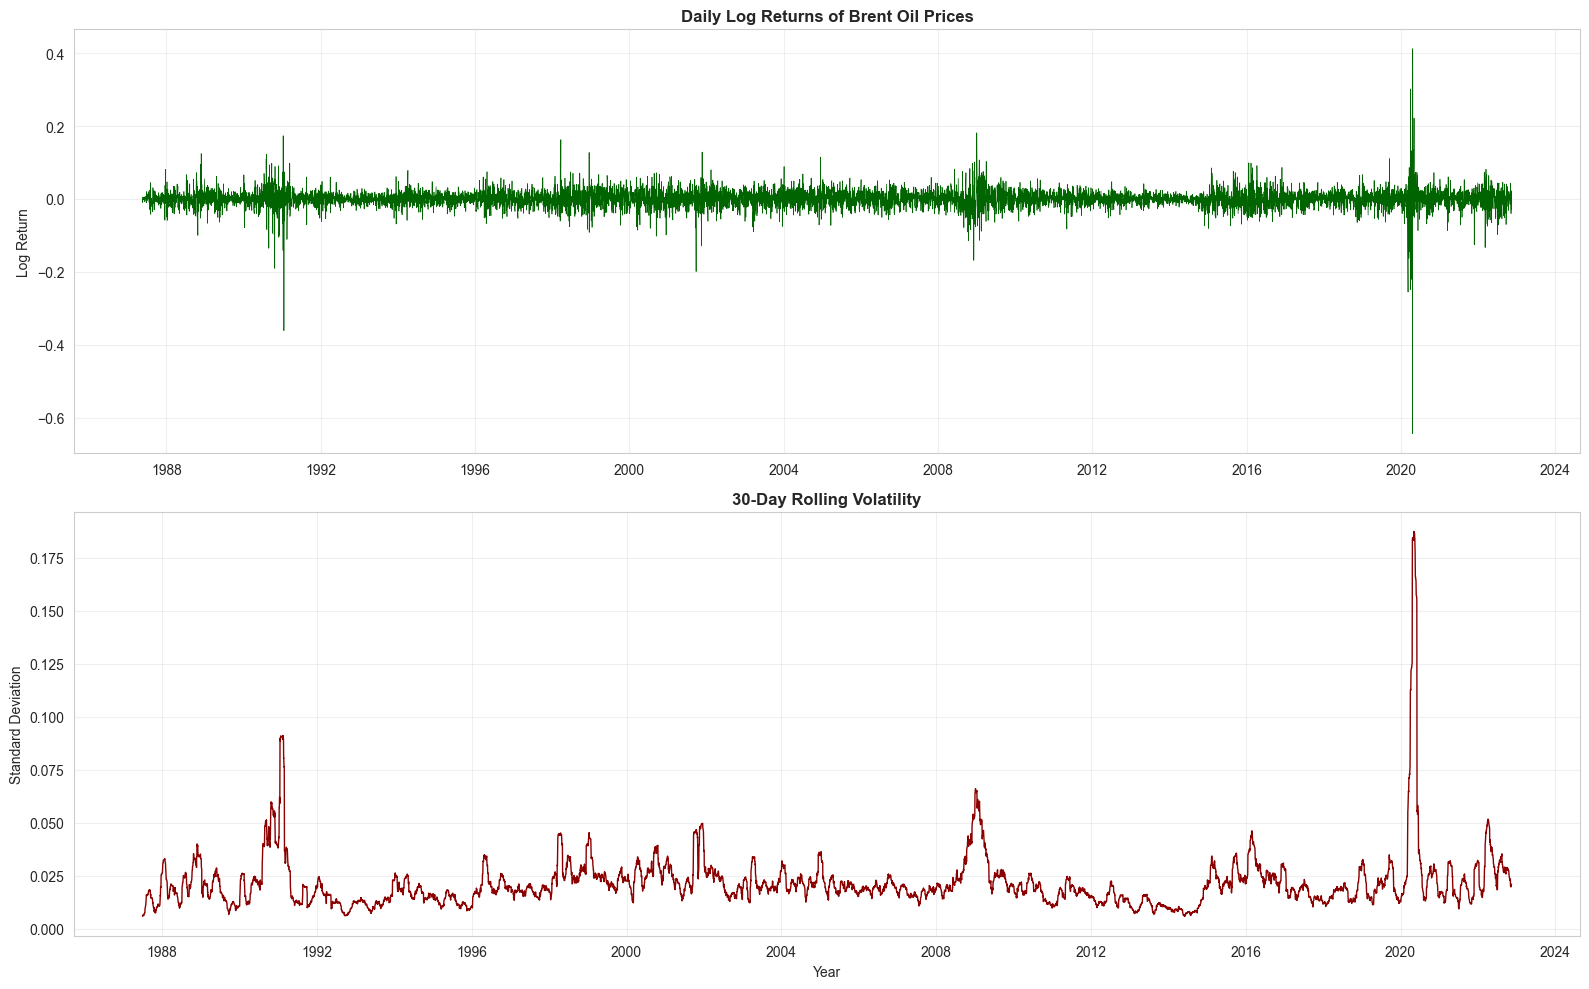

2026-02-05 18:37:45,342 - analysis - INFO - Log returns and volatility plot saved
2026-02-05 18:37:45,342 - analysis - INFO - Calculating summary statistics

TIME SERIES SUMMARY STATISTICS

PRICE STATISTICS:
  Mean: 48.4208
  Median: 38.5700
  Std Dev: 32.8601
  Min: 9.1000
  Max: 143.9500
  Range: 134.8500
  CV: 67.86%

LOG RETURNS STATISTICS:
  Mean: 0.000179
  Median: 0.000397
  Std Dev: 0.025531
  Min: -0.643699
  Max: 0.412023
  Skewness: -1.744501
  Kurtosis: 65.912361


In [7]:
# Cell 6: Time Series Properties Analysis
from analysis import TimeSeriesAnalyzer

# Execute time series analysis
ts_analyzer = TimeSeriesAnalyzer(df.copy())
df = ts_analyzer.calculate_log_returns()
ts_analyzer.plot_price_series()
ts_analyzer.plot_log_returns()
stats = ts_analyzer.summary_statistics()

### Step 1.5: Stationarity Testing

In [8]:
# Cell 7: Stationarity Testing
from analysis import StationarityTester

# Execute stationarity tests
stationarity_tester = StationarityTester(df)
test_results = stationarity_tester.perform_tests()
stationarity_tester.display_results(test_results)

2026-02-05 18:37:45,353 - analysis - INFO - Running ADF test on Price Series
2026-02-05 18:37:45,704 - analysis - INFO - Running KPSS test on Price Series
2026-02-05 18:37:45,706 - analysis - INFO - Running ADF test on Log Returns


c:\GitHub\Statistical-Modeling-of-Time-Series-Data\src\analysis.py:303: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


2026-02-05 18:37:46,099 - analysis - INFO - Running KPSS test on Log Returns

STATIONARITY TEST RESULTS

Price Series - ADF Test
------------------------------------------------------------
  Test Statistic: -1.993856
  P-value: 0.289274
  Stationary (α=0.05): False
  Interpretation: Fail to reject H0 - likely non-stationary

Price Series - KPSS Test
------------------------------------------------------------
  Test Statistic: 9.558800
  P-value: 0.010000
  Stationary (α=0.05): False
  Interpretation: Reject H0 - likely non-stationary

Log Returns - ADF Test
------------------------------------------------------------
  Test Statistic: -16.428319
  P-value: 0.000000
  Stationary (α=0.05): True
  Interpretation: Reject H0 (non-stationary) at 5% level

Log Returns - KPSS Test
------------------------------------------------------------
  Test Statistic: 0.034275
  P-value: 0.100000
  Stationary (α=0.05): True
  Interpretation: Fail to reject H0 (stationary) at 5% level


SUMMARY FOR MOD

c:\GitHub\Statistical-Modeling-of-Time-Series-Data\src\analysis.py:303: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


## Summary and Next Steps

In [9]:
# Cell 8: Task 1 Summary and Deliverables Checklist
print('\n' + '='*80)
print('TASK 1 COMPLETION SUMMARY')
print('='*80)

print(f'''
✓ DELIVERABLES COMPLETED:

1. Data Analysis Workflow
   - 8-phase comprehensive workflow documented
   - All steps, tools, and dependencies defined
   - Ready for implementation

2. Data Preparation & Validation
   - Data loaded: {len(df)} records
   - Date range: {df['Date'].min().date()} to {df['Date'].max().date()}
   - Price range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}
   - Missing values: Handled
   - Data quality: Validated ✓

3. Major Events Compilation
   - 15 key geopolitical and economic events compiled
   - Categories: Conflicts, OPEC decisions, financial crises
   - Exported to: major_events.csv

4. Assumptions & Limitations Documentation
   - 6 core assumptions documented with risk levels
   - 6 limitations identified with impact assessment
   - Correlation vs Causation framework explained
   - File: assumptions_and_limitations.txt

5. Time Series Analysis
   - Summary statistics calculated
   - Stationarity tests completed
   - Visualizations generated:
     * Price series plot
     * Log returns and volatility plots

6. Ready for Next Phase:
   - Data prepared and validated
   - Event data compiled and structured
   - Assumptions documented
   - Properties understood for modeling

NEXT STEPS:
→ Move to Task 2: Bayesian Change Point Modeling
→ Build PyMC model with identified properties
→ Run MCMC sampling and analyze results

FILES GENERATED:
- major_events.csv
- assumptions_and_limitations.txt
- 01_brent_price_series.png
- 02_log_returns_volatility.png
- task_1_analysis.log
''')

print('='*80)
logger.info('Task 1: Foundation Analysis - COMPLETED')


TASK 1 COMPLETION SUMMARY

✓ DELIVERABLES COMPLETED:

1. Data Analysis Workflow
   - 8-phase comprehensive workflow documented
   - All steps, tools, and dependencies defined
   - Ready for implementation

2. Data Preparation & Validation
   - Data loaded: 9011 records
   - Date range: 1987-05-20 to 2022-11-14
   - Price range: $9.10 - $143.95
   - Missing values: Handled
   - Data quality: Validated ✓

3. Major Events Compilation
   - 15 key geopolitical and economic events compiled
   - Categories: Conflicts, OPEC decisions, financial crises
   - Exported to: major_events.csv

4. Assumptions & Limitations Documentation
   - 6 core assumptions documented with risk levels
   - 6 limitations identified with impact assessment
   - Correlation vs Causation framework explained
   - File: assumptions_and_limitations.txt

5. Time Series Analysis
   - Summary statistics calculated
   - Stationarity tests completed
   - Visualizations generated:
     * Price series plot
     * Log returns and